In [27]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Tuple, Optional

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
%load_ext autoreload
%autoreload 2
import fork_simulation as F
from custom_composite import CustomLayup, PlyProperties, MaterialType, create_layup_from_sequence

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Fork mass: 0.20 kg
Fork cost: £9.89
Natural frequency (1st mode): 4330.13 Hz


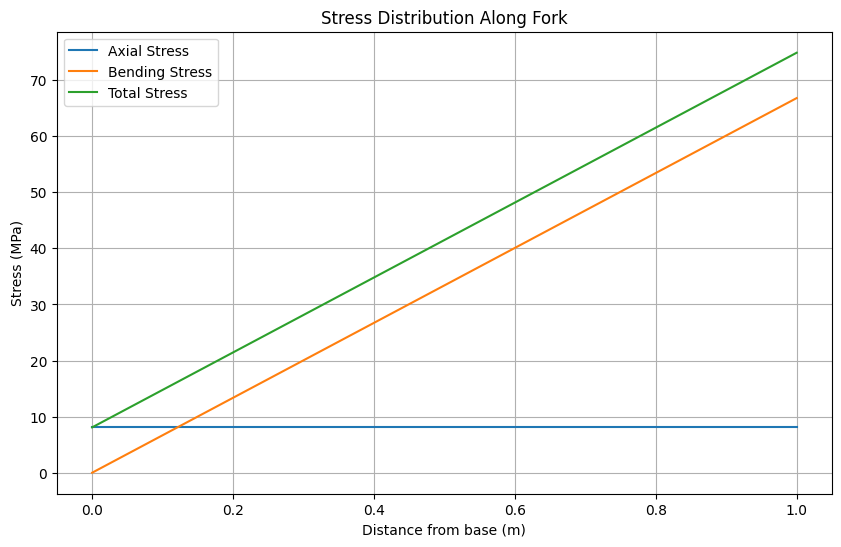

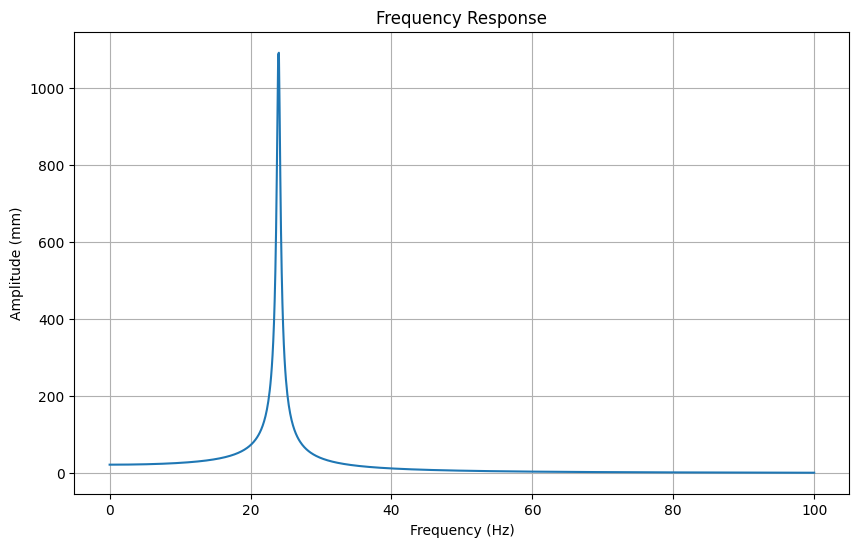

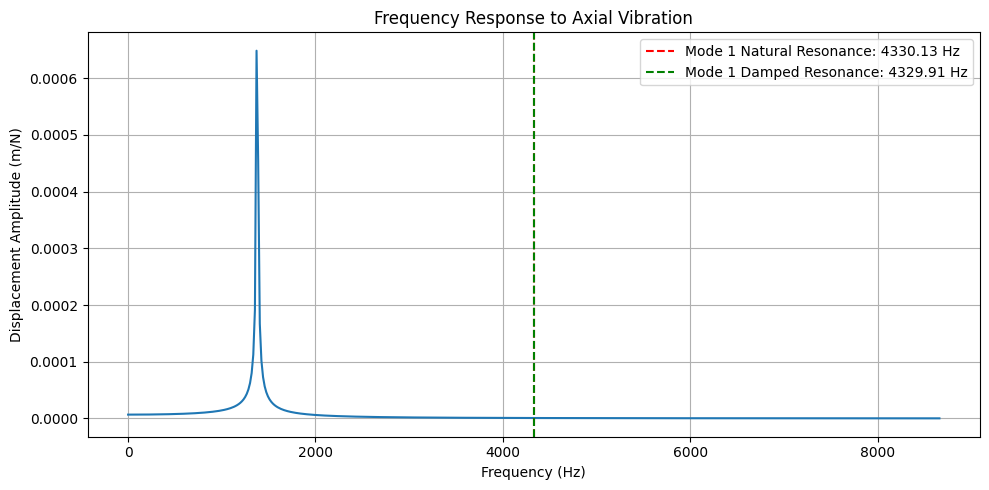

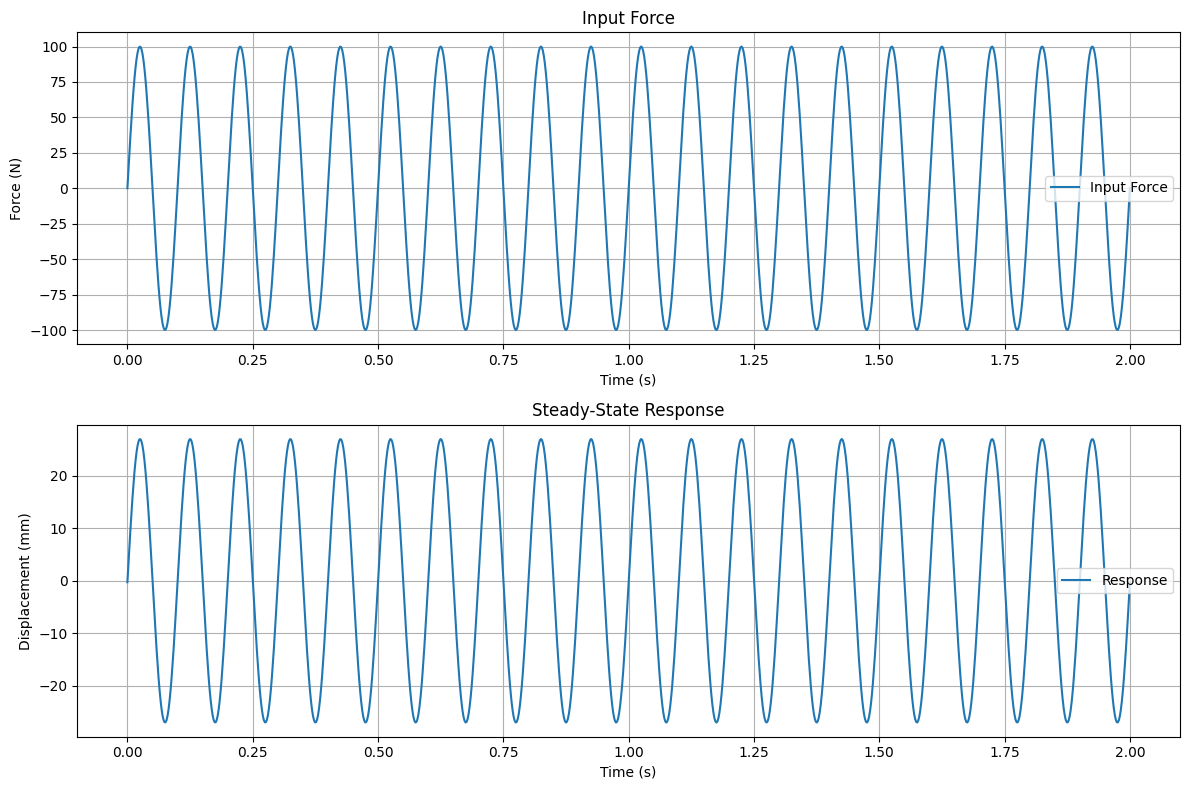

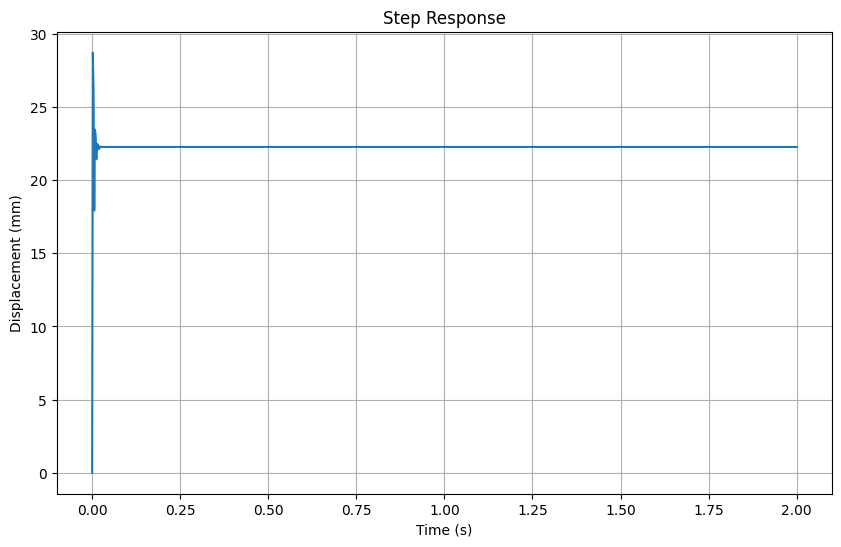

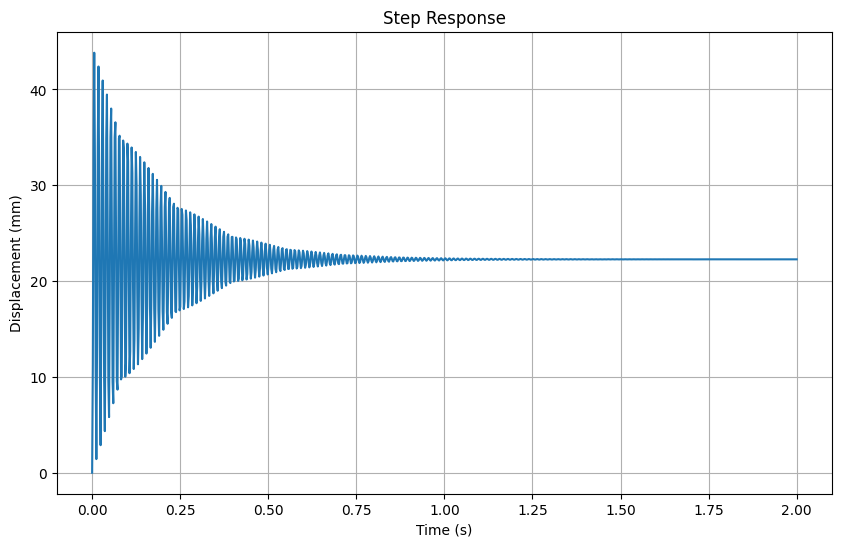

In [44]:
# Example material properties (Carbon Fiber)
material = F.MaterialProperties(
    E_axial=120,  # GPa
    E_transverse=8,  # GPa
    G=4.5,  # GPa
    nu=0.3,
    rho=1600,  # kg/m³
    cost_per_kg=50,  # £/kg
    damping_ratio=0.01
)

# Example geometry
geometry = F.ForkGeometry(
    length=1,  # m
    outer_diameter=0.05,  # m
    wall_thickness=0.0008  # m
)

# Create simulation
fork = F.ForkSimulation(material, geometry)

# Print basic properties
print(f"Fork mass: {fork.mass:.2f} kg")
print(f"Fork cost: £{fork.cost:.2f}")
print(f"Natural frequency (1st mode): {fork.natural_frequency()[0]:.2f} Hz")

# Example analysis
fork.plot_stress_distribution(axial_force=1000, transverse_force=100)  # 1000N axial, 500N transverse
fork.plot_frequency_response(force_amplitude=100, frequency_range=(0,100))
fork.plot_axial_frequency_response(force_amplitude=100)  # 100N force, 0-100Hz range 

# Time domain analysis
fork.plot_steady_state_vibration(force_amplitude=100, frequency=10)  # 100N at 10Hz
fork.plot_step_response(force_amplitude=100)  # 100N step force 
fork.plot_flex_step_response(force_amplitude=100)  # 100N step force 

In [30]:
%run custom_composite.py


Layup 1 Properties:
E_x: 14.308
E_y: 15.486
nu_xy: 0.379
G_xy: 19.158
thickness: 0.550
density: 1701.818
mass_per_area: 0.936

Layup 1 Ply Stresses (MPa):

Carbon 0° at z = -0.23 mm:
Global stresses: σx = 3.2, σy = -0.6, τxy = -0.2
Material stresses: σ1 = 3.2, σ2 = -0.6, τ12 = -0.2

Glass 45° at z = -0.08 mm:
Global stresses: σx = 1.1, σy = 0.3, τxy = 0.5
Material stresses: σ1 = 1.2, σ2 = 0.2, τ12 = -0.4

Kevlar -45° at z = 0.10 mm:
Global stresses: σx = 1.7, σy = 1.3, τxy = -0.8
Material stresses: σ1 = 2.3, σ2 = 0.7, τ12 = 0.2

Carbon 90° at z = 0.22 mm:
Global stresses: σx = 2.0, σy = -1.8, τxy = 0.5
Material stresses: σ1 = -1.8, σ2 = 2.0, τ12 = -0.5

Layup 2 Properties:
E_x: 20.703
E_y: 19.844
nu_xy: 0.456
G_xy: 36.156
thickness: 0.400
density: 1700.000
mass_per_area: 0.680

Layup 2 Ply Stresses (MPa):

Custom 0° at z = -0.15 mm:
Global stresses: σx = 3.6, σy = -0.7, τxy = -0.1
Material stresses: σ1 = 3.6, σ2 = -0.7, τ12 = -0.1

Carbon 45° at z = -0.05 mm:
Global stresses: σx = 1.7

In [31]:
sequence3 = [
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 45, 'name': 'Carbon 45°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': -45, 'name': 'Carbon -45°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': -45, 'name': 'Carbon -45°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 45, 'name': 'Carbon 45°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'}
]

layup3 = create_layup_from_sequence(sequence3)

props = layup3.calculate_effective_properties()
for key, value in props.items():
    print(f"{key}: {value:.3f}")

E_x: 76.394
E_y: 21.502
nu_xy: 0.740
G_xy: 39.059
thickness: 0.800
density: 1600.000
mass_per_area: 1.280


In [32]:
print(props['E_x'])

76.39433237864722


Fork mass: 0.20 kg
Fork cost: £9.89
Natural frequency (1st mode): 3454.94 Hz


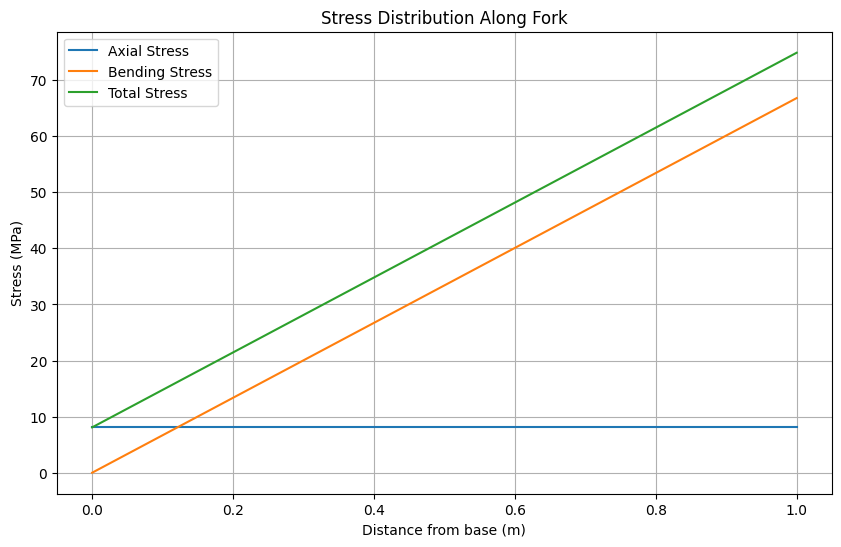

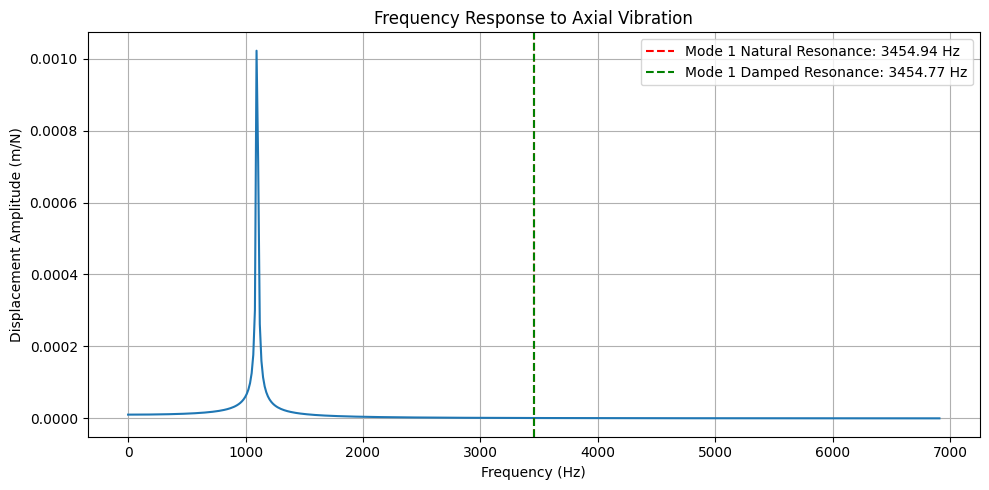

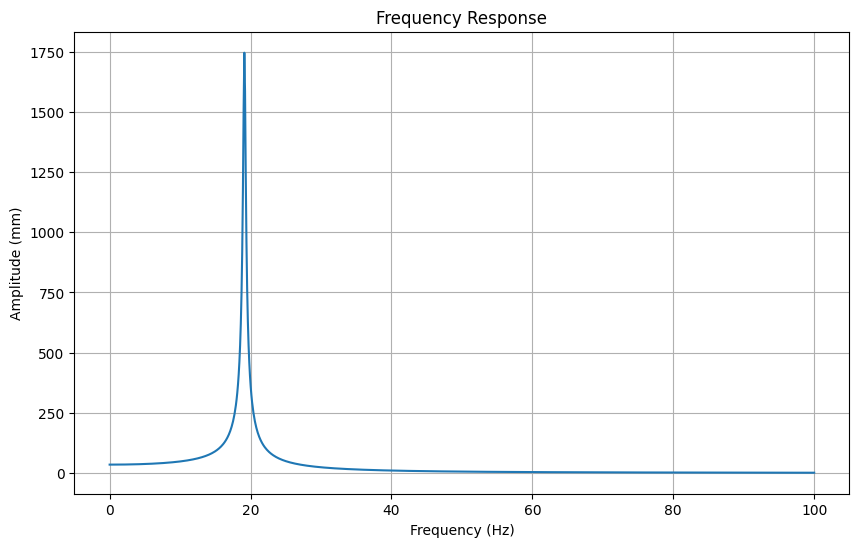

[3454.9405833]


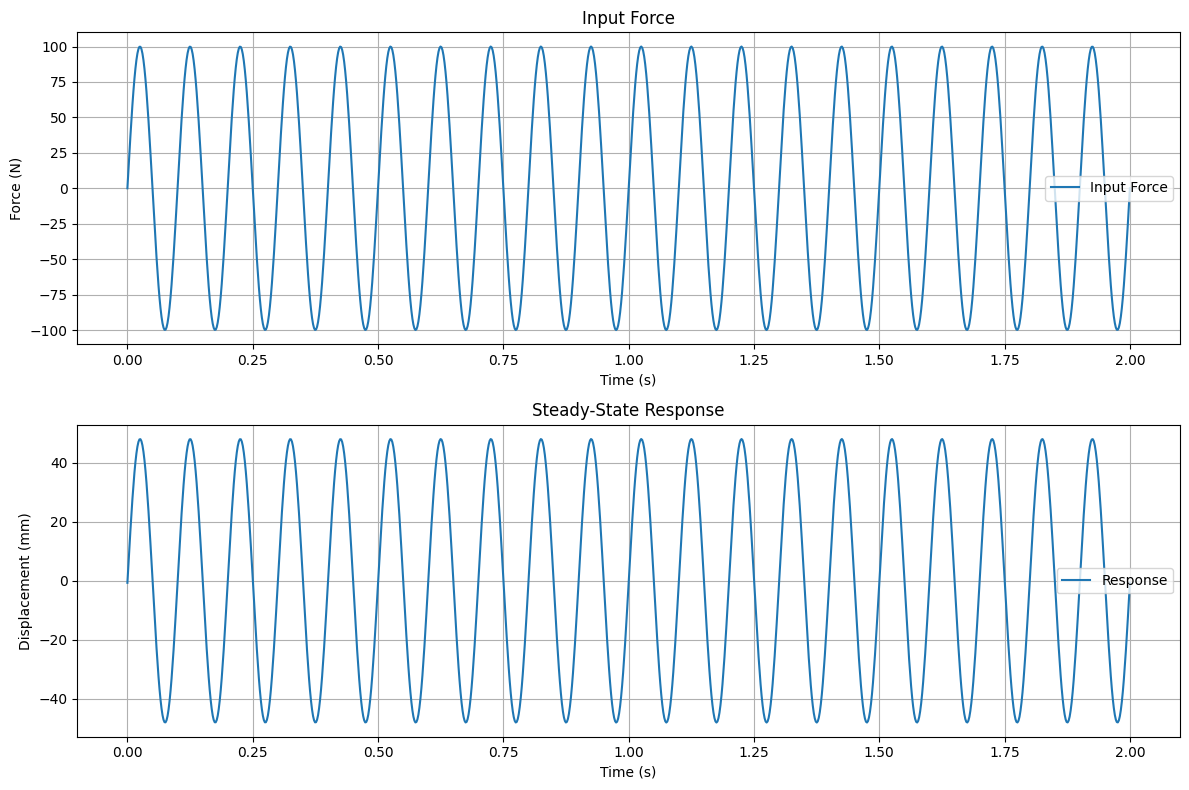

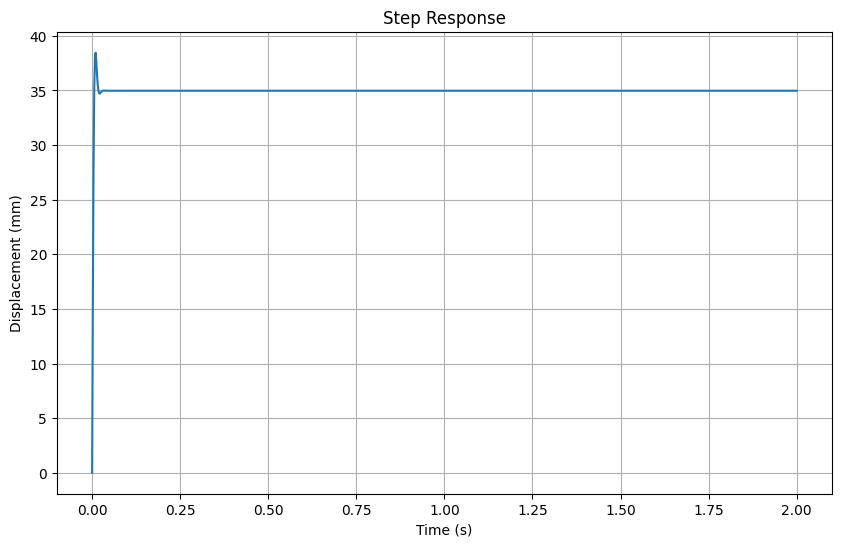

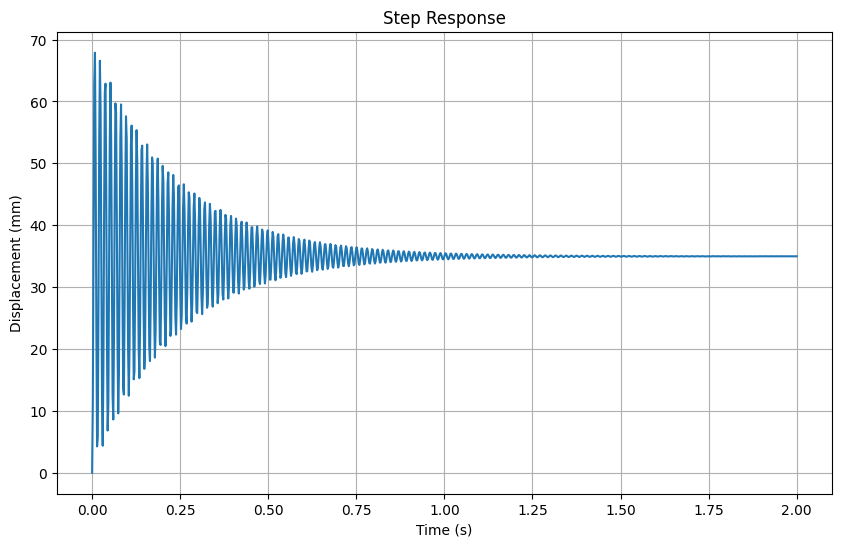

In [46]:
# Example material properties (Carbon Fiber)
material = F.MaterialProperties(
    E_axial=props['E_x'],  # GPa
    E_transverse=props['E_y'],  # GPa
    G=props['G_xy'],  # GPa
    nu=props['nu_xy'],
    rho=props['density'],  # kg/m³
    cost_per_kg=50,  # £/kg
    damping_ratio=0.01
)

# Example geometry
geometry = F.ForkGeometry(
    length=1,  # m
    outer_diameter=0.05,  # m
    wall_thickness=props['thickness']*1e-3  # m
)

# Create simulation
fork = F.ForkSimulation(material, geometry)

# Print basic properties
print(f"Fork mass: {fork.mass:.2f} kg")
print(f"Fork cost: £{fork.cost:.2f}")
print(f"Natural frequency (1st mode): {fork.natural_frequency()[0]:.2f} Hz")

# Example analysis
fork.plot_stress_distribution(axial_force=1000, transverse_force=100)  # 1000N axial, 500N transverse
fork.plot_axial_frequency_response(force_amplitude=100)  # 100N force, 0-100Hz range 
fork.plot_frequency_response(force_amplitude=100, frequency_range=(0,100))
print(fork.natural_frequency())

# Time domain analysis
fork.plot_steady_state_vibration(force_amplitude=100, frequency=10)  # 100N at 10Hz
fork.plot_step_response(force_amplitude=100)  # 100N step force 
fork.plot_flex_step_response(force_amplitude=100)  # 100N step force 

